In [1]:
#importing all required python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt #use to visualize dataset values
import seaborn as sns
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import os
from keras.models import Sequential, load_model
from keras.layers import Dense, Activation
from keras.layers import Dropout
from keras.callbacks import ModelCheckpoint
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Convolution2D
import pickle

Using TensorFlow backend.
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16

In [2]:
from sklearn.preprocessing import MinMaxScaler
#class to normalize dataset values
scaler = MinMaxScaler(feature_range = (0, 1))
scaler1 = MinMaxScaler(feature_range = (0, 1))

In [3]:
#loading and displaying dataset values
import pandas as pd
dataset = pd.read_excel("D:/Expenses Prediction/Dataset/Expenses.xlsx",engine='openpyxl')
dataset.fillna(0, inplace = True)
dataset

,Date,Expenses,Category,Amount,Municipality,Province,Region,ID
0,2020-01-15 00:00:00,Transportation,Survival,41.0,Quezon City,Metro Manila,National Capital Region,E2020-1
1,2020-01-15 00:00:00,Transportation,Survival,40.0,Quezon City,Metro Manila,National Capital Region,E2020-2
2,2020-01-16 00:00:00,Food/Drinks,Optional,35.0,Quezon City,Metro Manila,National Capital Region,E2020-3
3,2020-01-16 00:00:00,Eating/Going Out,Optional,139.0,Quezon City,Metro Manila,National Capital Region,E2020-4
4,2020-01-16 00:00:00,Transportation,Survival,40.0,Quezon City,Metro Manila,National Capital Region,E2020-5
...,...,...,...,...,...,...,...,...
1355,0,0,0,0.0,0,0,0,0
1356,0,0,0,0.0,0,0,0,0
1357,0,0,0,0.0,0,0,0,0
1358,0,0,0,0.0,0,0,0,0


In [4]:
#displaying different expenses category found in dataset
import numpy as np
# Convert the 'Expenses' column to string (or handle NaNs if necessary)
dataset['Expenses'] = dataset['Expenses'].astype(str)
# Get unique expense categories
expenses_category = np.unique(dataset['Expenses'])
# Print the categories
for i in range(len(expenses_category)):
    print(f"Category ID = {i+1} Category Expenses Name = {expenses_category[i]}")

Category ID = 1 Category Expenses Name = 0
Category ID = 2 Category Expenses Name = Apartment
Category ID = 3 Category Expenses Name = Bank fees
Category ID = 4 Category Expenses Name = Cable
Category ID = 5 Category Expenses Name = Clothing/Shoes/Personal Items
Category ID = 6 Category Expenses Name = Credit Card
Category ID = 7 Category Expenses Name = Debt repayment
Category ID = 8 Category Expenses Name = Eating/Going Out
Category ID = 9 Category Expenses Name = Electricity/Water
Category ID = 10 Category Expenses Name = Entertainment/Subscriptions
Category ID = 11 Category Expenses Name = Food/Drinks
Category ID = 12 Category Expenses Name = Garbage
Category ID = 13 Category Expenses Name = Grocery
Category ID = 14 Category Expenses Name = Hair Cut
Category ID = 15 Category Expenses Name = Health Insurance
Category ID = 16 Category Expenses Name = Healthcare
Category ID = 17 Category Expenses Name = Home
Category ID = 18 Category Expenses Name = Magazines/Newspapers/Books
Category

In [5]:
#finding and displaying count of missing or null values from each column
dataset.isnull().sum()

Date            0
Expenses        0
Category        0
Amount          0
Municipality    0
Province        0
Region          0
ID              0
dtype: int64

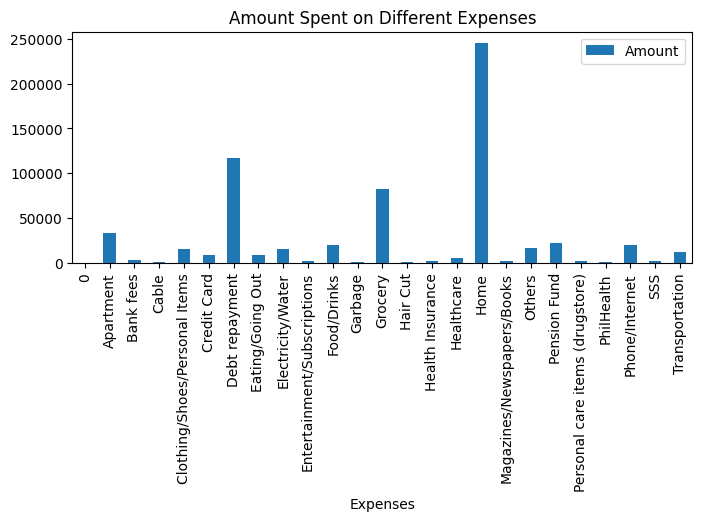

In [6]:
import matplotlib.pyplot as plt  # Correct import for pyplot
# Grouping the data by Expenses and summing the Amount
data = dataset.groupby(["Expenses"])['Amount'].sum().reset_index()
# Plotting the data
data.plot(x="Expenses", y="Amount", kind="bar", figsize=(8, 3))
# Adding a title to the plot
plt.title('Amount Spent on Different Expenses')
# Displaying the plot
plt.show()


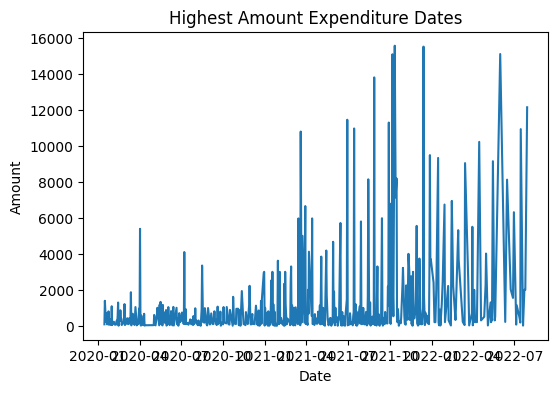

In [7]:
#Visualizing graph of amount spend on different Dates
import matplotlib.pyplot as plt
import pandas as pd
dataset['Date'] = pd.to_datetime(dataset['Date'], errors='coerce')
dataset = dataset.dropna(subset=['Date'])
data = dataset.groupby(['Date'])['Amount'].sum().reset_index()
plt.figure(figsize=(6, 4))
plt.plot(data['Date'], data['Amount'])
plt.title('Highest Amount Expenditure Dates')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.show()


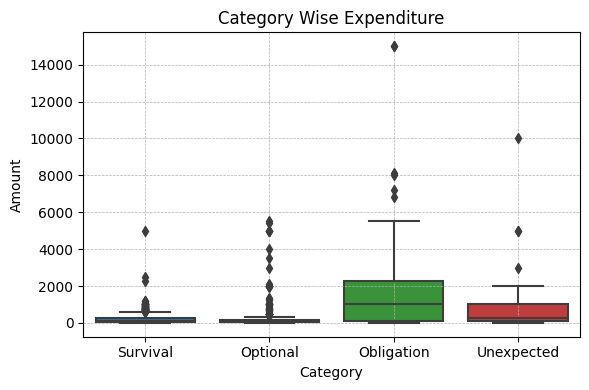

In [8]:
#visualizing graph of amount spent on different categories 
import matplotlib.pyplot as plt
import pandas as pd
plt.figure(figsize=(6, 4))
import seaborn as sns
sns.boxplot(x="Category", y="Amount", data=dataset)
plt.title('Category Wise Expenditure')
plt.xlabel('Category')
plt.ylabel('Amount')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


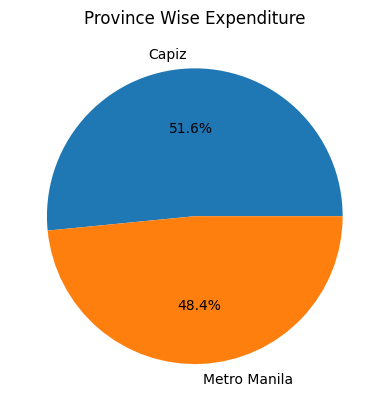

In [9]:
# visualizing graph of total expenses done at different Province
data = dataset.groupby(["Province"]) ['Amount' ].sum().reset_index()
plt.pie(data['Amount'], labels=data['Province'], autopct='%1.1f%%')
plt.title('Province Wise Expenditure' )
plt.show()

In [10]:
from sklearn.preprocessing import LabelEncoder
#dataset peprocessing converting datetime to numeric values and non-numeric values to numeric values
dataset['Date'] = pd.to_datetime(dataset['Date' ])
dataset['year' ] = dataset['Date'].dt.year
dataset['month'] = dataset['Date'].dt.month
dataset['day'] = dataset['Date'].dt.day
label_encoder = []
columns = dataset.columns
types = dataset.dtypes.values
for i in range(len(types)):
    name = types[i]
    if name == 'object': #finding column with object type
        le = LabelEncoder()
        dataset[columns[i]] = pd.Series(le.fit_transform(dataset[columns[i]].astype(str)))#encode all str columns to numeric
        label_encoder.append([columns[i], le])
#handling and removing missing values
dataset.drop(['Date'], axis = 1,inplace=True)#drop ir-relevant columns
dataset.fillna(0, inplace = True)
print("Cleaned Dataset Values")
dataset

Cleaned Dataset Values


c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCo

,Expenses,Category,Amount,Municipality,Province,Region,ID,year,month,day
0,23,2,41.00,6,1,0,0,2020,1,15
1,23,2,40.00,6,1,0,111,2020,1,15
2,9,1,35.00,6,1,0,222,2020,1,16
3,6,1,139.00,6,1,0,333,2020,1,16
4,23,2,40.00,6,1,0,415,2020,1,16
...,...,...,...,...,...,...,...,...,...,...
1161,11,2,1000.00,4,0,1,1067,2022,7,25
1162,1,1,25.00,4,0,1,1068,2022,7,29
1163,4,0,8124.25,1,1,0,1069,2022,7,29
1164,15,0,3000.00,4,0,1,1070,2022,7,29


In [11]:
from sklearn.preprocessing import MinMaxScaler
if 'Amount' in dataset.columns:
    Y = dataset['Amount'].values.reshape(-1, 1)  # Get the Amount values for Y (target variable)
    dataset.drop(['Amount'], axis=1, inplace=True)  # Drop the 'Amount' column from the dataset
else:
    print("'Amount' column is not found in the dataset.")
X = dataset.values
scaler = MinMaxScaler()
scaler1 = MinMaxScaler()
X = scaler.fit_transform(X)
Y = scaler1.fit_transform(Y)
print("Normalized Features = " + str(X))

Normalized Features = [[1.         0.66666667 0.85714286 ... 0.         0.         0.46666667]
 [1.         0.66666667 0.85714286 ... 0.         0.         0.46666667]
 [0.39130435 0.33333333 0.85714286 ... 0.         0.         0.5       ]
 ...
 [0.17391304 0.         0.14285714 ... 1.         0.54545455 0.93333333]
 [0.65217391 0.         0.57142857 ... 1.         0.54545455 0.93333333]
 [0.         0.         0.85714286 ... 1.         0.54545455 0.93333333]]


In [12]:
from sklearn.model_selection import train_test_split
import numpy as np
# Split the data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
# Print the information about the dataset split
print("Train & Test Dataset Split")
print("Total records found in dataset = " + str(X.shape[0]))
print("Total features found in dataset = " + str(X.shape[1]))
print("80% records used to train AI Algorithms : " + str(X_train.shape[0]))
print("20% records used to AI Algorithms : " + str(X_test.shape[0]))
# If you still want to save and load data, you can use the following:
# Save the data (for example, saving the train and test data as a numpy array):
np.save('model/data.npy', (X_train, X_test, y_train, y_test))
# If you need to load it again later, use this (assuming file exists):
# data = np.load("model/data.npy", allow_pickle=True)
# X_train, X_test, y_train, y_test = data

Train & Test Dataset Split
Total records found in dataset = 1166
Total features found in dataset = 9
80% records used to train AI Algorithms : 932
20% records used to AI Algorithms : 234


c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


In [13]:
#defining global variables to save algorithm performnace metrics
rsquare = []
mse = []
rmse = []

In [14]:
#function to calculate MAPE, RMSE and R2Square from predicted and true values
global test_label,r2_score,sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def calculateMetrics(algorithm, predict, test_labels):
    mse_error = mean_squared_error(test_labels, predict)
    predict = predict.reshape(-1, 1)
    predict = scaler1.inverse_transform(predict)
    test_label = scaler1.inverse_transform(test_labels)
    predict = predict.ravel()
    test_label = test_label.ravel()
    r2_scores = r2_score(test_label, predict)
    rmse_error = sqrt(mse_error)
    rsquare.append(r2_scores)
    mse.append(mse_error)
    rmse.append(rmse_error)
    print()
    print(algorithm+" MSE : "+str(mse_error))
    print(algorithm+" RMSE : "+str(rmse_error))
    print(algorithm+" R2 : "+str(r2_scores))
    print()
    plt.plot(test_label, color = 'red', label = 'True Expenses')
    plt.plot(predict, color = 'green', label = 'Predicted Expenses')
    plt.title(algorithm+'Expenditure Forecasting Graph')
    plt.xlabel('Number Of Test Samples')
    plt.ylabel('Expenditure Forecasting')
    plt.legend()
    plt.show()
    for i in range(0, 10):
        print("True Expenditure Amount : "+str(test_label[i])+" Predicted Expenditure Amount : "+str(predict[i]))


Random Forest MSE : 0.004843724128808506
Random Forest RMSE : 0.06959686867100061
Random Forest R2 : 0.4836819245609839



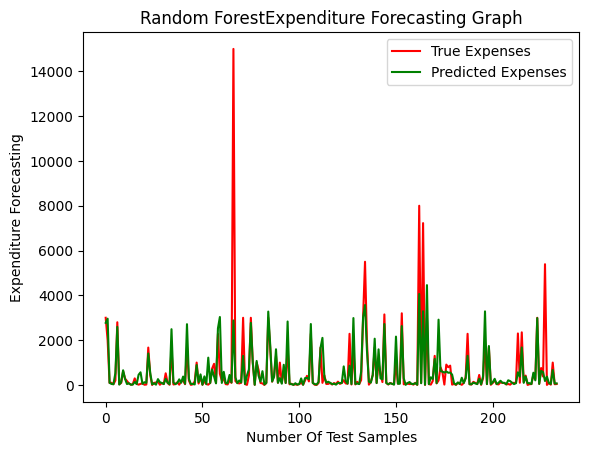

True Expenditure Amount : 3000.0 Predicted Expenditure Amount : 2775.7499999999973
True Expenditure Amount : 2000.0 Predicted Expenditure Amount : 2959.9999999999995
True Expenditure Amount : 89.0 Predicted Expenditure Amount : 97.3394761904762
True Expenditure Amount : 99.0 Predicted Expenditure Amount : 46.674697191697206
True Expenditure Amount : 35.0 Predicted Expenditure Amount : 32.69030740093244
True Expenditure Amount : 199.0 Predicted Expenditure Amount : 527.3892999999996
True Expenditure Amount : 2800.0 Predicted Expenditure Amount : 2593.446700000002
True Expenditure Amount : 35.0 Predicted Expenditure Amount : 18.04839257964259
True Expenditure Amount : 90.0 Predicted Expenditure Amount : 126.22188447028752
True Expenditure Amount : 611.12 Predicted Expenditure Amount : 657.6053722222224


In [15]:
#training Random Forest algorithm on training features and evaluating regression performance on test data
rf_cls = RandomForestRegressor()
rf_cls.fit(X_train, y_train.ravel())
#perform prediction on test datat
predict = rf_cls.predict(X_test)
#call this function to calculate performance metrics
calculateMetrics("Random Forest", predict, y_test)


Decision Tree MSE : 0.006347204430202941
Decision Tree RMSE : 0.07966934435655249
Decision Tree R2 : 0.32341803771832045



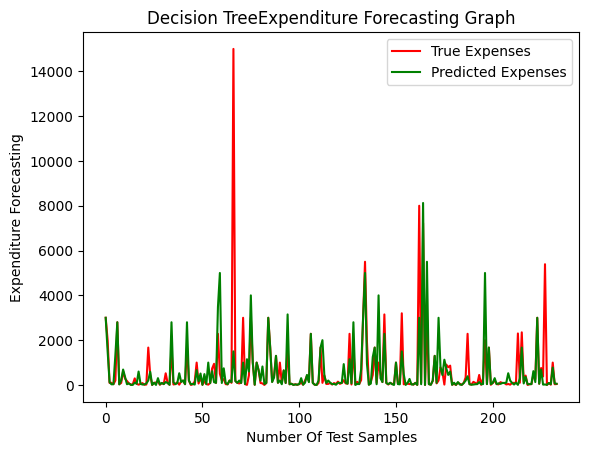

True Expenditure Amount : 3000.0 Predicted Expenditure Amount : 3000.0
True Expenditure Amount : 2000.0 Predicted Expenditure Amount : 1500.0
True Expenditure Amount : 89.0 Predicted Expenditure Amount : 125.0
True Expenditure Amount : 99.0 Predicted Expenditure Amount : 28.333333333333332
True Expenditure Amount : 35.0 Predicted Expenditure Amount : 35.0
True Expenditure Amount : 199.0 Predicted Expenditure Amount : 1337.78
True Expenditure Amount : 2800.0 Predicted Expenditure Amount : 2800.0
True Expenditure Amount : 35.0 Predicted Expenditure Amount : 25.0
True Expenditure Amount : 90.0 Predicted Expenditure Amount : 199.0
True Expenditure Amount : 611.12 Predicted Expenditure Amount : 690.0633333333334


In [16]:
#training propose AM-CTP Linear Regression algorithm
dt_cls = DecisionTreeRegressor()
dt_cls.fit(X_train, y_train.ravel())
#perform prediction on test datat
predict = dt_cls.predict(X_test)
#call this function to calculate performance metrics
calculateMetrics("Decision Tree", predict, y_test)




CNN MSE : 0.005052281975005024
CNN RMSE : 0.07107940612445368
CNN R2 : 0.46145064415330916



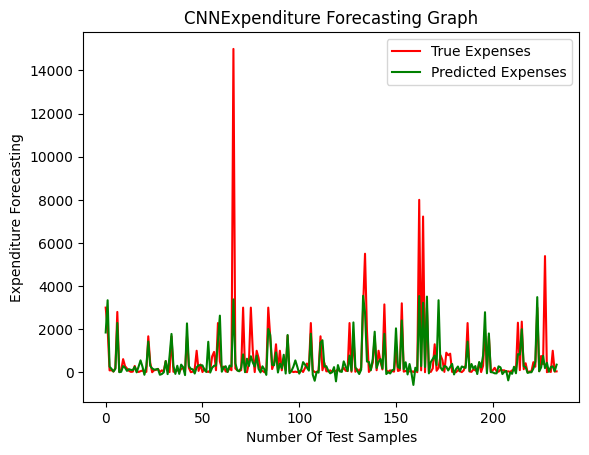

True Expenditure Amount : 3000.0 Predicted Expenditure Amount : 1847.2415
True Expenditure Amount : 2000.0 Predicted Expenditure Amount : 3342.3787
True Expenditure Amount : 89.0 Predicted Expenditure Amount : 261.8035
True Expenditure Amount : 99.0 Predicted Expenditure Amount : 160.643
True Expenditure Amount : 35.0 Predicted Expenditure Amount : 35.28351
True Expenditure Amount : 199.0 Predicted Expenditure Amount : 162.5799
True Expenditure Amount : 2800.0 Predicted Expenditure Amount : 2288.3818
True Expenditure Amount : 35.0 Predicted Expenditure Amount : 5.0188527
True Expenditure Amount : 90.0 Predicted Expenditure Amount : 23.356655
True Expenditure Amount : 611.12 Predicted Expenditure Amount : 286.71106


In [17]:
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense
from keras.callbacks import ModelCheckpoint
import os
# Reshaping the data for CNN input
X_train1 = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1, 1))
X_test1 = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1, 1))
# Create CNN model
cnn_model = Sequential()
cnn_model.add(Convolution2D(32, (1, 1), input_shape=(X_train1.shape[1], X_train1.shape[2], X_train1.shape[3]), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(1, 1)))
cnn_model.add(Convolution2D(32, (1, 1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(1, 1)))
cnn_model.add(Flatten())
cnn_model.add(Dense(units=64, activation='relu'))
cnn_model.add(Dense(units=1))
# Compile the CNN model
cnn_model.compile(optimizer='adam', loss='mean_squared_error')
# Check if the model weights file exists, if not, train the model
if not os.path.exists("model/cnn_weights.hdf5"):
    model_check_point = ModelCheckpoint(filepath='model/cnn_weights.hdf5', verbose=1, save_best_only=True)
    cnn_model.fit(X_train1, y_train, batch_size=16, epochs=100, validation_data=(X_test1, y_test), callbacks=[model_check_point])
else:
    cnn_model.load_weights("model/cnn_weights.hdf5")
# Perform prediction
predict = cnn_model.predict(X_test1)
# Call the function to calculate metrics
calculateMetrics("CNN", predict, y_test)


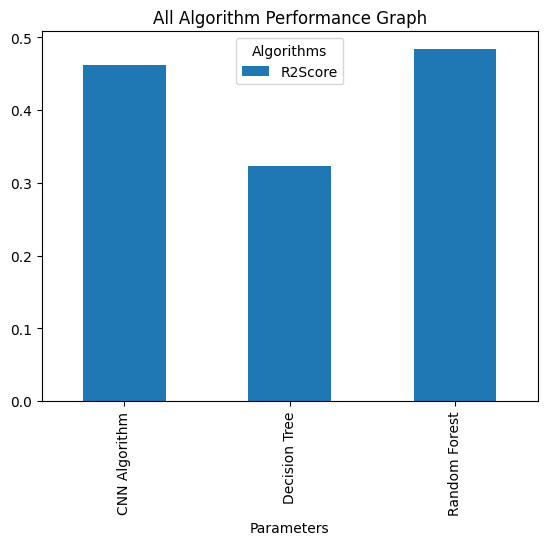

In [18]:
global test_label,r2_scores,sqrt
from sklearn.metrics import r2_score
df = pd.DataFrame([['Random Forest','R2Score',rsquare[0]],
                   ['Decision Tree','R2Score',rsquare[1]],
                   ['CNN Algorithm','R2Score',rsquare[2]],
                  ],columns=['Parameters','Algorithms','Value'])
df.pivot("Parameters", "Algorithms", "Value").plot(kind='bar')
plt.title("All Algorithm Performance Graph")
plt.show()

In [19]:
#display all algorithm performnace in tabular format
algorithms = ['Random Forest', 'Decision Tree', 'CNN']
data = []
for i in range(len(rmse)):
    data.append([algorithms[i], rsquare[i], rmse[i], mse[i]])
data = pd.DataFrame(data, columns=['Algorithm Name', 'R2 Score', 'RMSE', 'MSE' ])
data

,Algorithm Name,R2 Score,RMSE,MSE
0,Random Forest,0.483682,0.069597,0.004844
1,Decision Tree,0.323418,0.079669,0.006347
2,CNN,0.461451,0.071079,0.005052


In [20]:
#read test values from test dataset file and then predict cellular traffic demand
test_data = pd.read_excel("D:/Expenses Prediction/Dataset/testData.xlsx",engine='openpyxl')
test_data.fillna(0, inplace = True)
temp = test_data.values
test_data['Date'] = pd.to_datetime(test_data['Date'])#convert datetime to numeric format
test_data['year'] = test_data['Date'].dt.year
test_data['month'] = test_data['Date'].dt.month
test_data['day'] = test_data['Date'].dt.day
test_data.drop(['Date'], axis = 1,inplace=True)
for i in range(len(label_encoder)):
    le = label_encoder[i]
    test_data[le[0]] = pd.Series(le[1].transform(test_data[le[0]].astype(str)))#encode all str columns to numeric
#handling and removing missing values
test_data.fillna(0, inplace = True)
test_data = test_data.values
test_data = scaler.transform(test_data)#select features using select k-best
predict = dt_cls.predict(test_data)#perform prediction using XGBOOST on test data
predict = predict.reshape(-1, 1)
predict = scaler1.inverse_transform(predict)#denormalize pedicted demand
for i in range(len(predict)):
    print("Test Data = "+str(temp[i])+" Future Forecasted Expenses = "+str(predict[i,0]))
    print()

Test Data = [Timestamp('2021-07-06 00:00:00') 'Transportation' 'Survival'
 'Quezon City' 'Metro Manila' 'National Capital Region' 'E2021-273'] Future Forecasted Expenses = 33.75

Test Data = [Timestamp('2021-07-08 00:00:00') 'Phone/Internet' 'Optional'
 'Quezon City' 'Metro Manila' 'National Capital Region' 'E2021-274'] Future Forecasted Expenses = 90.9

Test Data = [Timestamp('2021-07-08 00:00:00') 'Garbage' 'Obligation' 'Quezon City'
 'Metro Manila' 'National Capital Region' 'E2021-275'] Future Forecasted Expenses = 11.875000000000004

Test Data = [Timestamp('2021-07-08 00:00:00') 'Food/Drinks' 'Optional' 'Quezon City'
 'Metro Manila' 'National Capital Region' 'E2021-276'] Future Forecasted Expenses = 3.0

Test Data = [Timestamp('2021-07-09 00:00:00') 'Food/Drinks' 'Survival' 'Quezon City'
 'Metro Manila' 'National Capital Region' 'E2021-277'] Future Forecasted Expenses = 163.0

Test Data = [Timestamp('2021-07-11 00:00:00') 'Food/Drinks' 'Survival' 'Quezon City'
 'Metro Manila' 'Nati

c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


In [21]:
def recommendation(svd_model, item, top_n_community = 5):
    index = item - 1
    row = svd_model[index, :]
    magnitude = np.sqrt(np.einsum('ij, ij -> i', svd_model, svd_model))
    similarity = np.dot(row, svd_model.T) / (magnitude[index] * magnitude)
    sort_indexes = np.argsort(-similarity)
    return sort_indexes[:top_n_community]

In [22]:
import pandas as pd
import numpy as np
# Read dataset
dataset = pd.read_excel("D:/Expenses Prediction/Dataset/Expenses.xlsx", engine='openpyxl')
# Check data types and see if there are mixed types in the 'Expenses' column
print(dataset['Expenses'].dtype)
# Convert 'Expenses' to string to ensure uniformity
dataset['Expenses'] = dataset['Expenses'].astype(str)
# Now, use np.unique to get unique expenses
expenses = np.unique(dataset['Expenses'].ravel())
# Continue with the rest of your processing
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset['Day'] = dataset['Date'].dt.dayofyear
# Pivot the dataset
dataset = pd.pivot_table(dataset, values='Amount', index='Expenses', columns='Day')
dataset.fillna(0, inplace=True)
# Perform SVD
u, s, svd_matrix = np.linalg.svd(dataset, full_matrices=False)
print("Recommendation Model Generated")

object
Recommendation Model Generated


In [ ]:
global recommendation
category_id = input("Please Expenses Category ID for Recommendation : ")
category_id = int(category_id)
recommend = recommendation(svd_matrix, category_id)
print("Recommended Expenses List\n")
for i in range(len(recommend)):
    print(expenses[recommend[i]])